In [11]:
%matplotlib inline
import scipy.io, os, math, matplotlib.pyplot as plt, random, numpy as np, pandas, pdb,  itertools

# Replication

In [12]:
# read in data that associates climate with languages.  NB: this is 
# organized by language, and indexed via glottocode for the language.
ids_data_from_matlab = scipy.io.loadmat('ridsplusdata.mat')

/home/stephan/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [13]:
# mean temp is in col number 5, and is temperature * 10, hence /10 here.
ids_temps = ids_data_from_matlab['rorigclimdata'][:,5]/10.

In [14]:
# list of glottocodes, in same order as temp.
ids_gcs = [x[0][0] for x in ids_data_from_matlab['rlabels']]

In [15]:
temp_for_glottocode = dict(zip(ids_gcs, ids_temps))

In [16]:
ice_code =  ['1', '770']    # IDS concept code, in list form
snow_code = ['1', '760']    # IDS concept code, in list form
basedir = 'ids'
wls = []  # word lists
for fname in os.listdir(basedir):  
    full_fname = basedir +'/'+ fname
    # print fname
    ice = []  # no form found yet
    snow = [] # no form found yet
    wl = {}  # dict for this word list
    with open(full_fname) as f:
        for line in f:
            elts = line.split('\t')
            code = elts[0].split('-')[:2]   # first 2 items, in a list
            form = elts[1]
            lgname = elts[3].strip()
            if (code == ice_code):
                ice.append(form) #this gets all forms
            elif (code == snow_code):
                snow.append(form) #this gets all forms
        wl['num'] = int(fname[:-4])  # chop off ".txt" and int-ify
        wl['lgname'] = lgname
        wl['ice'] = ice
        wl['snow'] = snow
        wls.append(wl)

In [17]:
gc_by_lg = {}
with open('allcodes.txt') as f:
    for line in f:
        elts = line.split(' ')
        idsnum = int(elts[0])
        gc = elts[1]
        iso = elts[2]
        gc_by_lg[idsnum] = gc  

In [18]:
wls[1]

{'ice': ['ijs'], 'lgname': 'Dutch', 'num': 191, 'snow': ['sneeuw']}

In [21]:
# ** YOUR CODE GOES HERE.
# we define a list called results. it will be built up by cycling
# through the wordlists we have in wls. for each such wordlist, we
# determine whether there is a single form for ice and snow, and we
# also look up the glottocode (gc) for that wordlist, via gc_by_lg, 
# and use that to get temperature.  
# IF a given word list:
# 1. has an entry for ice and an entry for snow, and
# 2. has a valid glottocode, i.e. one that is not 'empty123', and 
# 3. has an associated temperature that is an actual number, 
#    i.e. not math.isnan(local_temp), and
# 4. has a glottocode that has not already been stashed away in results,
# THEN:
# append the data for this wordlist in results as a tuple:
# (language_name, glottocode, local_temperature, samediff)
# where samediff is a boolean indicating whether, in this wordlist,
# there exists a form that is listed both as a translation for ice and
# as a translation for snow.
results = []
for wl in wls:
    # cycle through wordlists.
    # entry for ice or snow
    rdict = {}
    rdict['language'] = wl['lgname']
    rdict['glottocode'] = gc_by_lg[wl['num']]
    if not rdict['glottocode'] or rdict['glottocode'] == 'empty123':
        rdict['error'] = 'Missing glottocode' 
    else:                
        if len(wl['ice']) > 0 and len(wl['snow']) > 0:                        
            rdict['same'] = len(set(wl['ice']).intersection(set(wl['snow']))) > 0

            rdict['temp'] = temp_for_glottocode[rdict['glottocode']]
            if np.isnan(rdict['temp']):
                rdict['error'] = 'Missing temperature'
            else:
                rdict['error'] = 'No error'                                
                rdict['ice'] = wl['ice'][0]
                rdict['snow'] = wl['snow'][0]
                rdict['ice_n'] = len(rdict['ice'])
                rdict['snow_n'] = len(rdict['snow'])                
        else:
            rdict['error'] = 'ice or snow missing from wordlist'
        results.append(rdict)     



In [22]:
df = pandas.DataFrame(results)
df

,error,glottocode,ice,ice_n,language,same,snow,snow_n,temp
0,No error,cofa1242,čã'disɨʔkʰo,18,Cofán,True,čã'disɨʔkʰo,18,23.366667
1,No error,dutc1256,ijs,3,Dutch,False,sneeuw,6,9.358333
2,No error,cham1309,за̄,6,Chamalal,False,аᴴз,7,2.666667
3,ice or snow missing from wordlist,yagu1244,NaN,NaN,Yagua,NaN,NaN,NaN,NaN
4,No error,ship1254,[iiro],6,Shipibo-Conibo,False,oiṣ̌ɨwa,11,26.525000
5,No error,darg1241,миъ,6,Dargwa (Dialect Urakhi),False,дахІа,10,4.308333
6,No error,arch1244,хъол,8,Archi (Variant 2),False,марххыла,16,0.433333
7,ice or snow missing from wordlist,iton1250,NaN,NaN,Itonama,NaN,NaN,NaN,NaN
8,No error,nucl1235,sar̃uyc̷ʰ,12,"Armenian, Eastern",False,d͜zyun,7,6.216667
9,ice or snow missing from wordlist,esee1248,NaN,NaN,Ese Ejja (Huarayo),NaN,NaN,NaN,NaN


In [23]:
df['error'].value_counts()

No error                             206
ice or snow missing from wordlist     68
Missing temperature                    6
Name: error, dtype: int64

In [24]:
from unidecode import unidecode
df['language'][0]

df['language_label'] = [x.decode('utf-8') for x in df['language']]

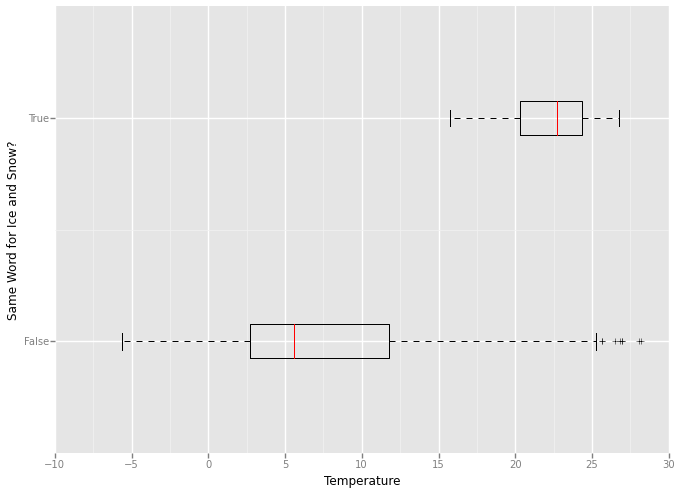

<ggplot: (8745254802885)>

In [25]:
from ggplot import *

ggplot(aes(y='same', x='temp'), data=df.loc[df['error'] == 'No error']) +\
    geom_boxplot() + xlab('Temperature') + ylab('Same Word for Ice and Snow?')
    

In [73]:
#length of word in each case

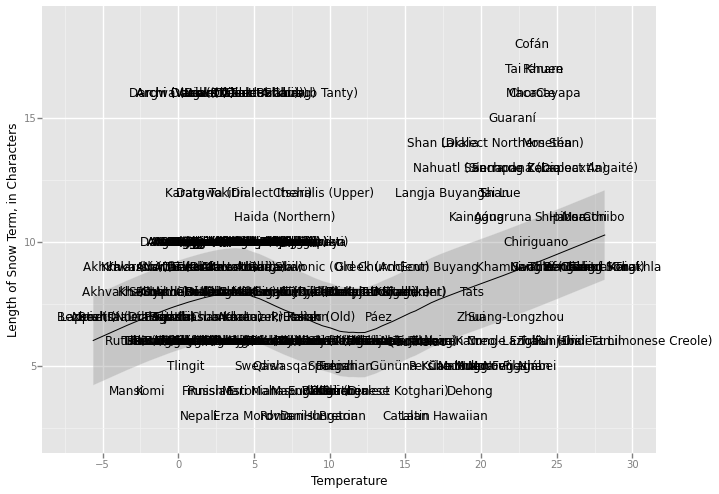

<ggplot: (8740767319705)>

In [91]:
ggplot(aes(y='snow_n', x='temp'), data=df.loc[df['error'] == 'No error']) +\
    geom_text(aes(label='language_label'), position='jitter') + xlab('Temperature') + ylab('Length of Snow Term, in Characters') +\
    stat_smooth(method="gam")

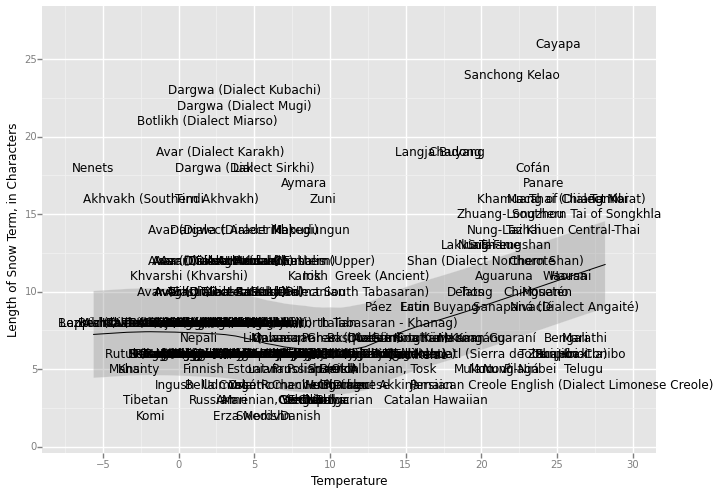

<ggplot: (8740766023073)>

In [92]:
ggplot(aes(y='ice_n', x='temp'), data=df.loc[df['error'] == 'No error']) +\
    geom_text(aes(label='language_label'), position='jitter') + xlab('Temperature') + ylab('Length of Ice Term, in Characters') +\
    stat_smooth(method="gam")

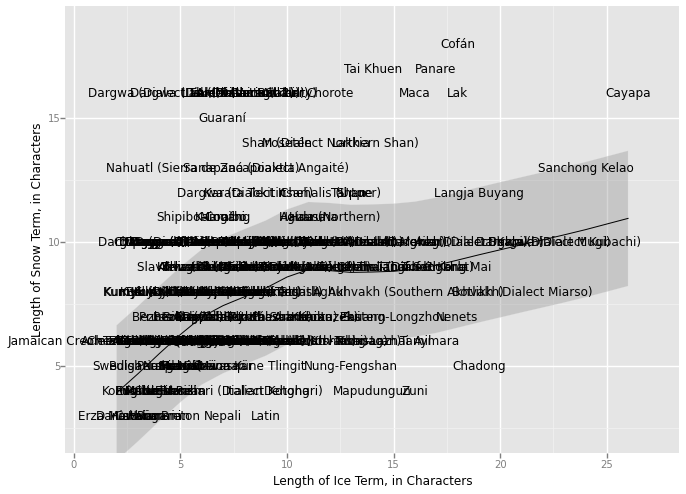

<ggplot: (8740767234593)>

In [93]:
ggplot(aes(x='ice_n', y='snow_n'), data=df.loc[df['error'] == 'No error']) +\
    geom_text(aes(label='language_label'), position='jitter') + xlab('Length of Ice Term, in Characters') + ylab('Length of Snow Term, in Characters') +\
    stat_smooth(method="gam")

# Extension

The logic for this is almost exactly the same as for the main "results" loop above - with the exception that now instead of checking whether there is a non-empty overlap between words for ice and words for snow, we instead find the maximum similarity between words in those 2 lists. The languages for which that maximum similarity is 1.0 should be the lgs identified in replication - but now we can examine similarity continuously, not just in yes/no terms.

Go through the wordlists as before, building up a new list called ed_results (for edit distance results), by analogy with the results list above.  the only difference will be that now instead of storing, in each tuple, a boolean indicating whether there is a form that can be used for both ice and snow, we store a float between 0.0 and 1.0 which is the maximum similarity between any word in the ice list and any word in the snow list - for that wordlist.

In [7]:
def levenshtein(s1, s2):
    """
    levenshtein distance.
    """
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previous_row and current_row are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]


def string_similarity(s1,s2):
    """
    similarity between 2 strings s1,s2, based on levenshtein distance.
    """
    maxlen = max(len(s1),len(s2))  # max poss lev dist.
    d = levenshtein(s1, s2)
    sim = float(maxlen-d) / float(maxlen)
    return sim
    
def max_string_similarity(l1,l2):
    """
    given 2 lists of strings, l1 and l2, find the maximum string similarity
    between a string from l1 and a string from l2.
    similarity is determined by string_similarity() and varies from 0 to 1.
    """
    allCombos = itertools.product(l1,l2)
    similarities = np.array([string_similarity(x[0], x[1]) for x in allCombos] )
    max_sim = np.max(similarities)

    return(max_sim)


In [4]:
string_similarity('cat','cats')

0.75

In [29]:
results = []
for wl in wls:
    # cycle through wordlists.
    # entry for ice or snow
    rdict = {}
    rdict['language'] = wl['lgname']
    rdict['glottocode'] = gc_by_lg[wl['num']]
    if not rdict['glottocode'] or rdict['glottocode'] == 'empty123':
        rdict['error'] = 'Missing glottocode' 
    else:                
        if len(wl['ice']) > 0 and len(wl['snow']) > 0:                        
            rdict['similarity'] = max_string_similarity(wl['ice'],wl['snow'])
            rdict['temp'] = temp_for_glottocode[rdict['glottocode']]
            if np.isnan(rdict['temp']):
                rdict['error'] = 'Missing temperature'
            else:
                rdict['error'] = 'No error'                                
                rdict['ice'] = wl['ice'][0]
                rdict['snow'] = wl['snow'][0]
                rdict['ice_n'] = len(rdict['ice'])
                rdict['snow_n'] = len(rdict['snow'])                
        else:
            rdict['error'] = 'ice or snow missing from wordlist'
        results.append(rdict) 


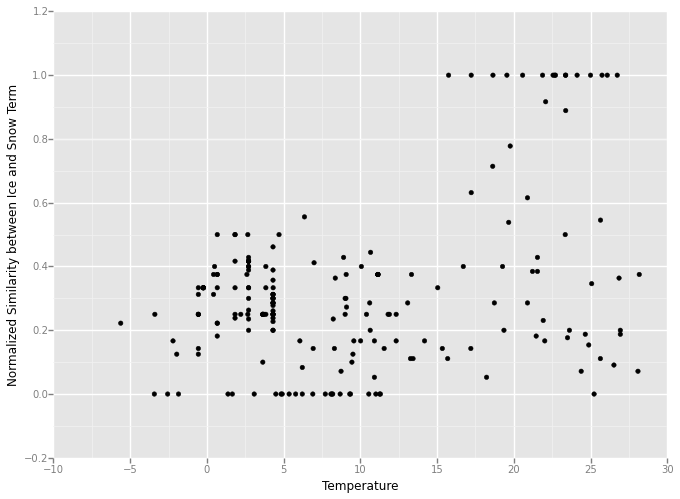

<ggplot: (8745255266685)>

In [32]:
df = pandas.DataFrame(results)
ggplot(aes(y='similarity', x='temp'), data=df.loc[df['error'] == 'No error']) +\
    geom_point() + xlab('Temperature') + ylab('Normalized Similarity between Ice and Snow Term')
    

In [ ]:
Loan words in the bottom right quadrant